In [3]:
from google.colab import files
uploaded = files.upload()


Saving midterm-regresi-dataset.csv to midterm-regresi-dataset.csv


In [4]:
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv("midterm-regresi-dataset.csv", header=None)

print("Dataset Shape:", df.shape)
display(df.head())

# target kolom pertama
y = df.iloc[:,0].astype(float)

# fitur sisanya
X = df.iloc[:,1:].astype(float)
print("Feature Shape:", X.shape)


Dataset Shape: (24299, 91)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Feature Shape: (24299, 90)


In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

print("Missing values AFTER imputation:", np.isnan(X_imputed).sum())


Missing values AFTER imputation: 0


In [6]:
low = np.percentile(X_imputed, 1, axis=0)
high = np.percentile(X_imputed, 99, axis=0)

X_clipped = np.clip(X_imputed, low, high)

print("Outlier handling done (1%–99% clipping).")


Outlier handling done (1%–99% clipping).


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clipped)

print("Scaling done. Mean (first 5):", X_scaled.mean(axis=0)[:5])
print("Std  (first 5):", X_scaled.std(axis=0)[:5])


Scaling done. Mean (first 5): [-4.07043701e-16 -2.92416452e-17  2.92416452e-17  1.40359897e-17
  9.35732645e-18]
Std  (first 5): [1. 1. 1. 1. 1.]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.values, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (19439, 90)  Test: (4860, 90)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)   # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=32,
    callbacks=[callback],
    verbose=1
)


Epoch 1/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2176276.7500 - mae: 1267.3145 - val_loss: 119449.0391 - val_mae: 272.3177
Epoch 2/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 93450.8906 - mae: 239.7906 - val_loss: 62811.3789 - val_mae: 193.4980
Epoch 3/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51351.7070 - mae: 176.1510 - val_loss: 38540.9062 - val_mae: 149.8524
Epoch 4/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 29710.3828 - mae: 131.9026 - val_loss: 23348.1758 - val_mae: 115.8806
Epoch 5/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17373.5859 - mae: 100.3593 - val_loss: 14446.5332 - val_mae: 89.0604
Epoch 6/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9965.3027 - mae: 75.5569 - val_loss: 8406.4277 - val_mae: 67.8208
Epoch 7/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5358.4336 - mae: 54.7438 - val_loss: 5080.6733 - val_mae: 51.7099
Epoch 8/80
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3112.6045 - mae: 40.9975 - val_loss

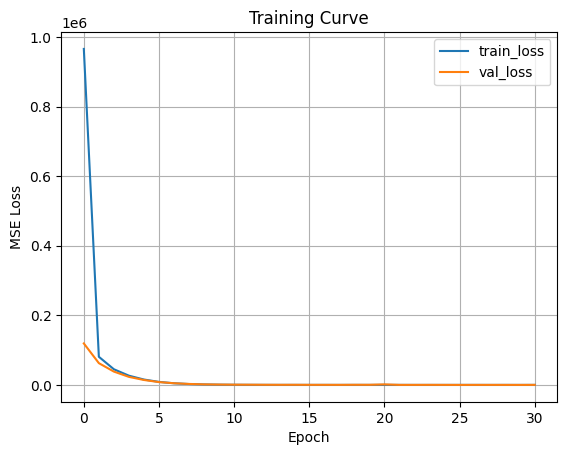

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Curve')
plt.legend()
plt.grid()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("=== MODEL PERFORMANCE ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== MODEL PERFORMANCE ===
MSE : 262.63395360109735
RMSE: 16.205985116650496
MAE : 11.451993614165382
R²  : -1.287516800344123


In [13]:
pred_df = pd.DataFrame({
    "y_true": y_test[:10],
    "y_pred": y_pred[:10]
})

display(pred_df)


,y_true,y_pred
0,2003.0,2060.303955
1,1994.0,2007.068970
2,2003.0,1997.745483
3,2001.0,2016.102905
4,2001.0,2008.895630
5,1987.0,1978.266357
6,2007.0,2010.252197
7,2009.0,1990.679077
8,2001.0,1994.368774
9,2006.0,2000.195679


In [14]:
pred_all = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
pred_all.to_csv("regression_predictions.csv", index=False)

print("Saved to regression_predictions.csv")


Saved to regression_predictions.csv
